### Data Visualization

## Objectives



    Visualize the distribution of data.

    Visualize the relationship between two features.

    Visualize composition of data.

    Visualize comparison of data.



## Connect to the database.

In [33]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

## Import pandas module.


In [34]:
import pandas as pd

In [125]:
df = pd.read_sql_query('SELECT * from sqlite_master',conn)
df.head()

,type,name,tbl_name,rootpage,sql
0,table,EduOther,EduOther,2,"CREATE TABLE ""EduOther"" (\n""Respondent"" INTEGE..."
1,table,DevType,DevType,741,"CREATE TABLE ""DevType"" (\n""Respondent"" INTEGER..."
2,table,LastInt,LastInt,1024,"CREATE TABLE ""LastInt"" (\n""Respondent"" INTEGER..."
3,table,JobFactors,JobFactors,1355,"CREATE TABLE ""JobFactors"" (\n""Respondent"" INTE..."
4,table,WorkPlan,WorkPlan,1808,"CREATE TABLE ""WorkPlan"" (\n""Respondent"" INTEGE..."


In [121]:
df.columns

Index(['type', 'name', 'tbl_name', 'rootpage', 'sql'], dtype='object')

## How to run an sql query

In [35]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


In [36]:
df.head()

,COUNT(*)
0,11398


In [37]:
df.columns

Index(['COUNT(*)'], dtype='object')

In [38]:
df.index

RangeIndex(start=0, stop=1, step=1)

In [39]:
df.describe()

,COUNT(*)
count,1.0
mean,11398.0
std,NaN
min,11398.0
25%,11398.0
50%,11398.0
75%,11398.0
max,11398.0


In [40]:
#check dup;icated values 
df.duplicated().sum()

0

In [71]:
#check null values 
df.isnull().sum()

Age             287
WorkWeekHrs     122
CodeRevHrs     2426
dtype: int64

In [76]:
# drop all rows with any NaN and NaT values
df= df.dropna()

In [77]:
#check null values 
df.isnull().sum()

Age            0
WorkWeekHrs    0
CodeRevHrs     0
dtype: int64

In [73]:
#check null values 
df.duplicated().sum()

5688

In [74]:
# drop all dupicated values 
df = df.drop_duplicates()



In [75]:
#check null values 
df.duplicated().sum()

0

In [45]:
# drop all dupicated values
df.head()

,COUNT(*)
0,11398


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          11111 non-null  float64
 1   WorkWeekHrs  11276 non-null  float64
 2   CodeRevHrs   8972 non-null   float64
dtypes: float64(3)
memory usage: 267.3 KB


In [78]:
df.shape

(2981, 3)

## How to list all tables

In [79]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## How to run a group by query

In [127]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)



,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## How to describe a table

In [81]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])
df.shape

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

(1, 1)

### Visualizing distribution of data


Histograms

Plot a histogram of ConvertedComp.


In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\AFC\AppData\Local\Temp\ipykernel_32048\4004961195.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df, 'ConvertedComp', hist = False, kde = True)


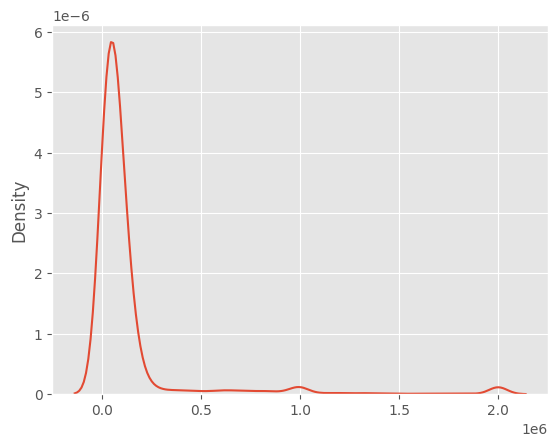

In [83]:
QUERY = """
SELECT ConvertedComp
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.head()
sns.distplot(df, 'ConvertedComp', hist = False, kde = True)

plt.show()

## Box Plots

Plot a box plot of Age.


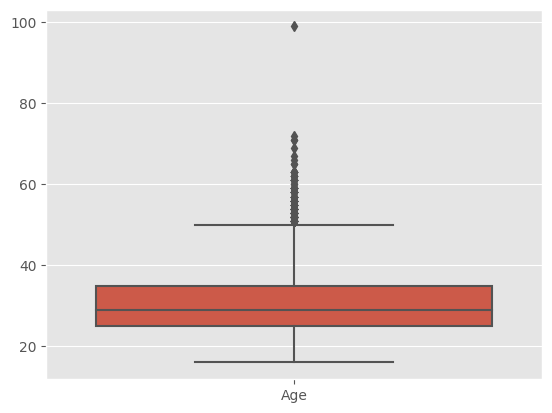

In [84]:

QUERY = """
SELECT Age
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.head()
sns.boxplot(df,)

plt.show()

## Visualizing relationships in data
Scatter Plots

Create a scatter plot of Age and WorkWeekHrs.


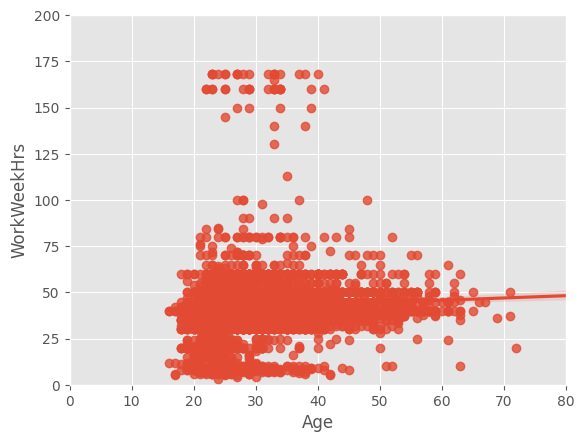

In [85]:
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.head()

# Age as potential predictor variable of WorkWeekHrs
sns.regplot(x="Age", y="WorkWeekHrs", data=df)
plt.ylim(0,200)
plt.xlim(0,80)

plt.show()

### Bubble Plots

Create a bubble plot of WorkWeekHrs and CodeRevHrs, use Age column as bubble size.


In [86]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0



Matplotlib version:  3.6.2


In [87]:
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.head()



,Age,WorkWeekHrs,CodeRevHrs
0,22.0,80.0,NaN
1,23.0,32.0,12.0
2,28.0,40.0,5.0
3,26.0,40.0,NaN
4,29.0,45.0,5.0


(0.0, 200.0)

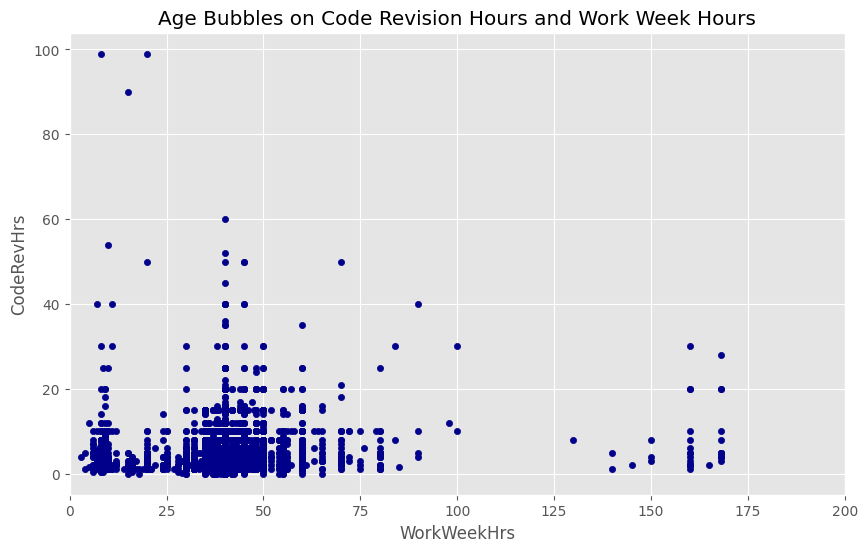

In [88]:
ax = df.plot(kind='scatter', x='WorkWeekHrs', y='CodeRevHrs', figsize=(10, 6), color='darkblue')

plt.title('Age Bubbles on Code Revision Hours and Work Week Hours')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.xlim(0,200)

In [93]:
#sns.regplot(x="WorkWeekHrs", y="CodeRevHrs", data=df)

In [98]:
# normalize Age data
norm_age = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())

# Age
ax = df.plot(kind='scatter', 
                    x='WorkWeekHrs',
                    y='CodeRevHrs',
                    alpha=0.5,
                    color="blue",
                    s=norm_age * 1000 + 10,
                    ax = ax
                   )

ax.set_ylabel('Code Revision Hours')
ax.set_title('Age Bubbles on Code Revision Hours and Work Week Hours')

plt.show()

## Visualizing composition of data
Pie Charts

Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [99]:
table_name = 'DatabaseDesireNextYear'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])


CREATE TABLE "DatabaseDesireNextYear" (
"Respondent" INTEGER,
  "DatabaseDesireNextYear" TEXT
)


In [100]:
QUERY = """
SELECT DatabaseDesireNextYear, count(DatabaseDesireNextYear) as Count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
"""
df = pd.read_sql_query(QUERY,conn)
df.sort_values('Count', ascending=False,inplace=True)

df = df.head(5)
total = df.sum(0)[1]

df['percent'] = 100 * df['Count']/total

df.set_index('DatabaseDesireNextYear')
print(df)

   DatabaseDesireNextYear  Count    percent
11             PostgreSQL   4328  24.809401
7                 MongoDB   3649  20.917168
12                  Redis   3331  19.094296
8                   MySQL   3281  18.807681
3           Elasticsearch   2856  16.371453


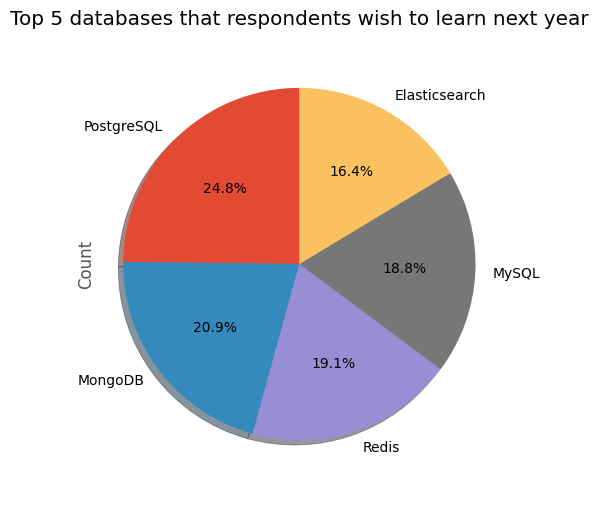

In [101]:
# autopct create %, start angle represent starting point
df['Count'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            labels=df['DatabaseDesireNextYear'])

plt.title('Top 5 databases that respondents wish to learn next year')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [102]:
table_name = 'LanguageDesireNextYear'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])


CREATE TABLE "LanguageDesireNextYear" (
"Respondent" INTEGER,
  "LanguageDesireNextYear" TEXT
)


In [104]:
QUERY = """
SELECT LanguageDesireNextYear, count(LanguageDesireNextYear) as Count
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
"""
df = pd.read_sql_query(QUERY,conn)
df.sort_values('Count', ascending=False,inplace=True)

df = df.head(5)
total = df.sum(0)[1]

df['percent'] = 100 * df['Count']/total

df.set_index('LanguageDesireNextYear')
print(df)


   LanguageDesireNextYear  Count    percent
13             JavaScript   6630  25.212001
11               HTML/CSS   5328  20.260866
18                 Python   5239  19.922425
22                    SQL   5012  19.059208
25             TypeScript   4088  15.545499


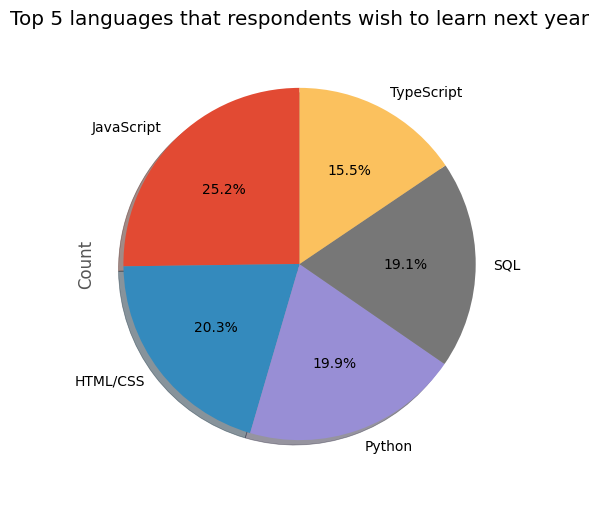

In [105]:
# autopct create %, start angle represent starting point
df['Count'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            labels=df['LanguageDesireNextYear'])

plt.title('Top 5 languages that respondents wish to learn next year')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [106]:
table_name = 'LanguageWorkedWith'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])


CREATE TABLE "LanguageWorkedWith" (
"Respondent" INTEGER,
  "LanguageWorkedWith" TEXT
)


In [107]:
QUERY = """
SELECT LanguageWorkedWith, count(LanguageWorkedWith) as Count
FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
"""
df = pd.read_sql_query(QUERY,conn)
df.sort_values('Count', ascending=False,inplace=True)

print(df.head(5))

       LanguageWorkedWith  Count
13             JavaScript   8687
11               HTML/CSS   7830
22                    SQL   7106
1   Bash/Shell/PowerShell   4642
18                 Python   4542


In [108]:
QUERY = """
SELECT Respondent, DatabaseWorkedWith, Count(*) AS Count
FROM DatabaseWorkedWith
GROUP BY Respondent
HAVING Count = 1 
   AND DatabaseWorkedWith = 'MySQL'
"""
df = pd.read_sql_query(QUERY,conn)
print(df.head())
print('The number of respondents who said they only work with MySQL is', df.shape[0])

   Respondent DatabaseWorkedWith  Count
0          25              MySQL      1
1         129              MySQL      1
2         147              MySQL      1
3         148              MySQL      1
4         194              MySQL      1
The number of respondents who said they only work with MySQL is 474


## Stacked Charts

Create a stacked chart of median WorkWeekHrs and CodeRevHrs for the age group 30 to 35.


In [110]:
#step 1: get the data needed
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
"""
df_age = pd.read_sql_query(QUERY,conn) 
#print(df_age.shape)

df_age

,WorkWeekHrs,CodeRevHrs,Age
0,80.0,NaN,22.0
1,32.0,12.0,23.0
2,40.0,5.0,28.0
3,40.0,NaN,26.0
4,45.0,5.0,29.0
...,...,...,...
11393,40.0,NaN,36.0
11394,40.0,5.0,25.0
11395,40.0,5.0,34.0
11396,42.5,2.0,25.0


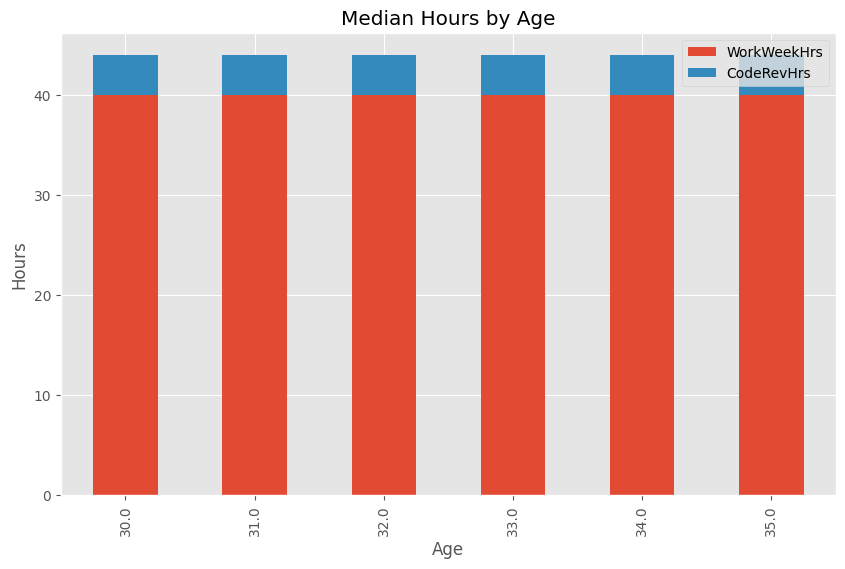

In [111]:
# group respondents by age and apply median() function 
df_age = df_age.groupby('Age', axis=0).median()
#df_age = df_age[30:35]
#print(df_age.shape)

# step 2: plot data
df_age[30:35].plot(kind='bar', figsize=(10, 6), stacked=True)

plt.xlabel('Age') # add to x-label to the plot
plt.ylabel('Hours') # add y-label to the plot
plt.title('Median Hours by Age') # add title to the plot

plt.show()

## Visualizing comparison of data
Line Chart

Plot the median ConvertedComp for all ages from 45 to 60.


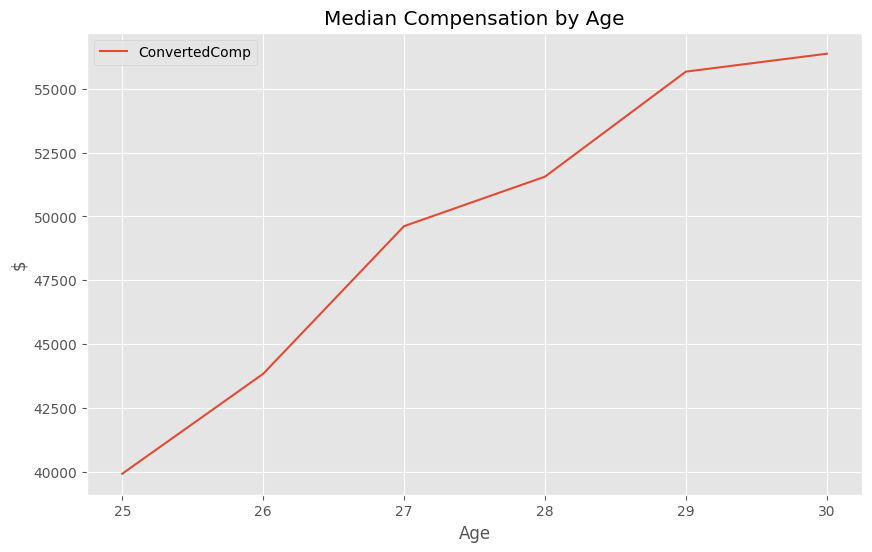

In [112]:
#step 1: get the data needed
QUERY = """
SELECT ConvertedComp, Age
FROM master
"""
df_comp = pd.read_sql_query(QUERY,conn) 

# group respondents by age and apply median() function 
df_comp = df_comp.groupby('Age', axis=0).median()


# step 2: plot data
df_comp[25:30].plot(kind='line', figsize=(10, 6), stacked=True)

plt.xlabel('Age') # add to x-label to the plot
plt.ylabel('$') # add y-label to the plot
plt.title('Median Compensation by Age') # add title to the plot

plt.show()

## Bar Chart

Create a horizontal bar chart using column MainBranch.


In [113]:
#step 1: get the data needed
QUERY = """
SELECT MainBranch, count(MainBranch) as Count
FROM master
GROUP BY MainBranch
"""
df_main = pd.read_sql_query(QUERY,conn) 
df_main.head()

,MainBranch,Count
0,I am a developer by profession,10618
1,"I am not primarily a developer, but I write co...",780


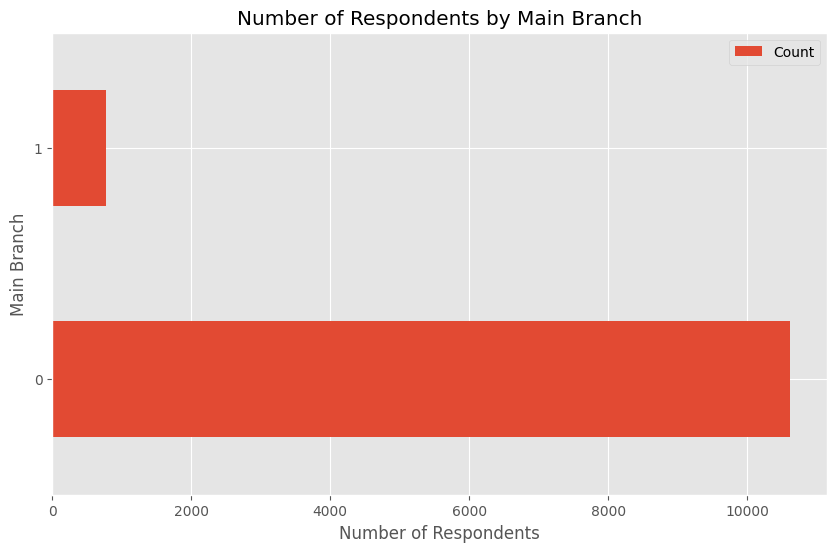

In [128]:
# step 2: plot data
df_main.plot(kind='barh', figsize=(10, 6))

plt.xlabel('Number of Respondents') # add to x-label to the plot
plt.ylabel('Main Branch') # add y-label to the plot
plt.title('Number of Respondents by Main Branch') # add title to the plot
plt.show()

In [129]:
table_name = 'DevType'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "DevType" (
"Respondent" INTEGER,
  "DevType" TEXT
)


In [130]:
#step 1: get the data needed
QUERY = """
SELECT DevType, count(DevType) as Count
FROM DevType
GROUP BY DevType
"""
df_type = pd.read_sql_query(QUERY,conn) 
df_type = df_type.sort_values('Count', ascending=False)
df_type.head()

,DevType,Count
11,"Developer, full-stack",6928
7,"Developer, back-end",6290
10,"Developer, front-end",3920
8,"Developer, desktop or enterprise applications",2575
13,"Developer, mobile",1959


Close the database connection.

In [ ]:
conn.close()